In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [30]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
# Let's check the count of each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
# Checking for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Outlier detection (applies to continues data only)

In [34]:
df_features = df[['age','trestbps','chol','thalach']]

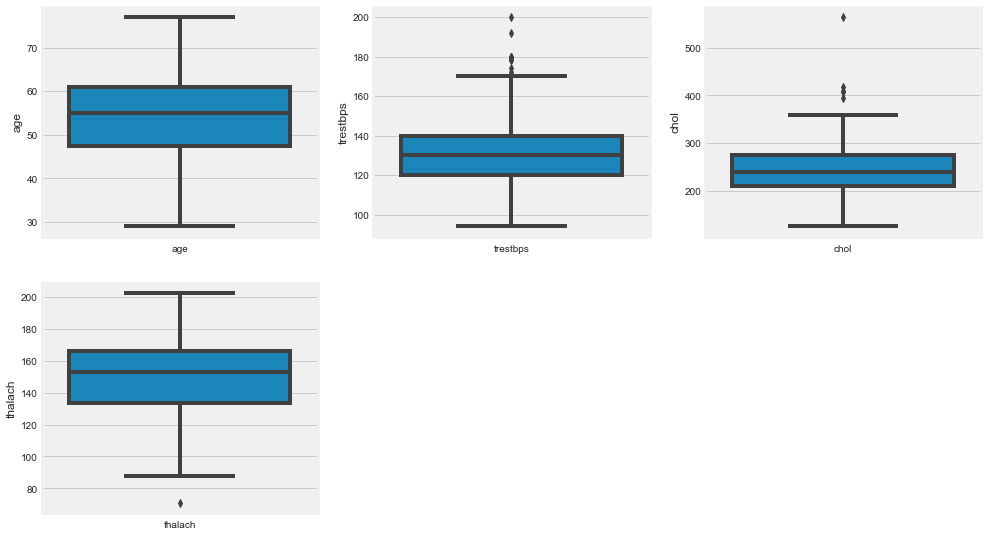

In [35]:
plt.figure(figsize=(15,50))
graph = 1

for column in df_features:
    if graph<=30:    
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)      
    graph+=1
plt.show()

## Outliers found in 
- trestbps 
- chol     
- thalach  

In [36]:
# Find the IQR (inter quantile range) to identify outliers

# 1st quantile
q1 = df.quantile(0.25)

# 3rd quantile
q3 = df.quantile(0.75)

# IQR
iqr = q3 -q1

## Outlier detection formula 
### higher side ==> Q3 + (1.5 * IQR)
### lower side  ==> Q1 - (1.5 * IQR)

In [37]:
# Validating one outlier
out_trestbps = (q3.trestbps + (1.5 * iqr.trestbps))
out_trestbps

170.0

### Outlier removel higher side

In [38]:
index = np.where(df['trestbps'] > out_trestbps)
index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)

In [39]:
df = df.drop(df.index[index])

In [40]:
df.shape

(294, 14)

In [41]:
df.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
index = np.where(df['chol'] > (q3.chol + (1.5 * iqr.chol)))
df = df.drop(df.index[index])
print ('Shape - ', df.shape)
df.reset_index()

Shape -  (289, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
285,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
286,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
287,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
index = np.where(df['thalach'] < (q1.thalach - (1.5 * iqr.thalach)))
df = df.drop(df.index[index])
print ('Shape - ', df.shape)
df.reset_index()

Shape -  (288, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
284,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
285,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
286,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
# Just find correlation of feature vs target using corrwith
df.drop('target', axis=1).corrwith(df.target)

age        -0.228234
sex        -0.313090
cp          0.426658
trestbps   -0.120231
chol       -0.109798
fbs        -0.021873
restecg     0.154995
thalach     0.431206
exang      -0.431165
oldpeak    -0.444884
slope       0.345785
ca         -0.388963
thal       -0.347019
dtype: float64

#### Visualize the correlation

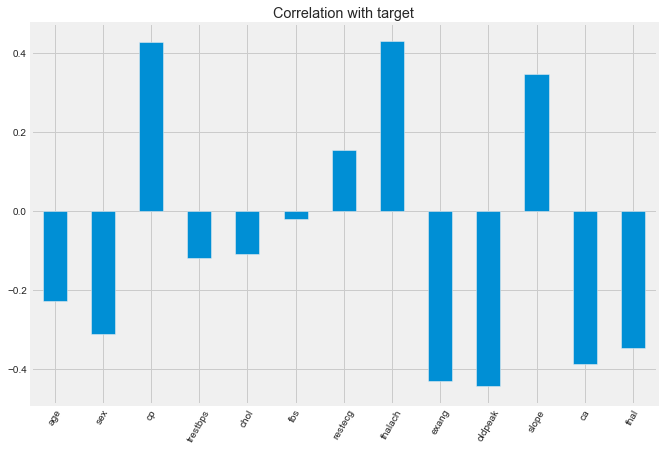

In [45]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(10, 7),rot = 60,
                                                   title="Correlation with target")
plt.show()

#### Let's play around with feature selection and see if that can help us building better model.

# Model building using SelectPercentile features

In [46]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

When we apply chi2, we get p-values for all features. Based on the p-values, it will select top 80% of features.

Example - If p-value < 0.05, it will reject null hypothesis. 
Default null hypothesis is, there is no relation b/w feature and target

In [47]:
# Instantiate SelectPercentile and fit (feature, label)
X = df.drop(['target'],axis=1)
y = df.target

SPercentile = SelectPercentile(score_func=chi2, percentile=80)

SPercentile = SPercentile.fit(X, y)

In [48]:
# Seperate the features to check p-values
cols = SPercentile.get_support(indices=True)
features = X.columns[cols]

In [49]:
df_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': SPercentile.scores_, 'pValue': SPercentile.pvalues_ })
df_scores.sort_values(by='Chi2Score',ascending=False)

,features,Chi2Score,pValue
7,thalach,183.939648,6.687836e-42
9,oldpeak,72.526212,1.648281e-17
11,ca,62.427456,2.764423e-15
2,cp,56.872707,4.649541e-14
8,exang,36.437110,1.576724e-09
4,chol,28.993682,7.261473e-08
0,age,22.988951,1.629352e-06
10,slope,9.123232,2.523837e-03
1,sex,8.430178,3.690442e-03
3,trestbps,7.581362,5.897487e-03


Let's print the top 80% features

In [50]:
print(cols)
print(features)

[ 0  1  2  3  4  7  8  9 10 11]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [51]:
# Create subset of selected features

X = df[features]

y = df.target

In [52]:
# Import libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler


scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)

# GradientBoostingClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        
print("\n================Train Result==========================")
        
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

#****************** Test score ***********************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result==========================")        
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


================Train Result==========================
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    93.0  108.0       1.0      201.0         201.0
_______________________________________________
Confusion Matrix: 
 [[ 93   0]
 [  0 108]]


=================Test Result==========================
Accuracy Score: 77.01%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.690476   0.844444  0.770115   0.767460      0.780733
recall      0.805556   0.745098  0.770115   0.775327      0.770115
f1-score    0.743590   0.791667  0.770115   0.767628      0.771773
support    36.000000  51.000000  0.770115  87.000

##### Let's try if we can improve the performance of our model using parameter tuning

# Hyperparmeter tuning 

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_param = {
    'max_depth' : range(4,12,2),
    'learning_rate' : np.arange(0.1, 1, 0.1),
    'min_samples_split': range(4,8,2)
}

In [57]:
grid = GridSearchCV(gbdt_clf,param_grid=grid_param)

grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [58]:
grid.best_params_

{'learning_rate': 0.8, 'max_depth': 10, 'min_samples_split': 6}

In [59]:
gbdt_clf = GradientBoostingClassifier(
    max_depth=4, min_samples_split=4, learning_rate=0.05)
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)
gbdt_clf_report = pd.DataFrame(
    classification_report(y_train, pred, output_dict=True))

print("\n================Train Result==========================")

print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

# ****************** Test score ***********************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(
    classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result==========================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


================Train Result==========================
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    93.0  108.0       1.0      201.0         201.0
_______________________________________________
Confusion Matrix: 
 [[ 93   0]
 [  0 108]]


=================Test Result==========================
Accuracy Score: 83.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.930233   0.83908   0.840116      0.855654
recall      0.916667   0.784314   0.83908   0.850490      0.839080
f1-score    0.825000   0.851064   0.83908   0.838032      0.840279
support    36.000000  51.000000   0.83908  87.000

### You can still tune the parameter and improve the score